In [44]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
def obtener_full_path(directorio):
    return [os.path.join(directorio, file) for file in os.listdir(directorio)]


In [46]:
df = pd.concat(map(lambda x: pd.read_csv(x, parse_dates=[
               0], dayfirst=True), obtener_full_path('input')))
df = df.sort_values('Fecha')


In [47]:
df_salidas = df.query('Movimiento == "Salida"')
costos_por_unidades = df_salidas.groupby('Destino').sum().reset_index()


In [48]:
costos_por_unidades


,Destino,Cantidad,Neto Unitario,Neto Total
0,ANATOMIA PATOLOGICA,1539,13265427.02,3.636708e+07
1,APNEA,6,136210.91,1.450165e+05
2,BODEGA ALIMENTACION,235116,2563603.02,1.012611e+08
3,BODEGA CENTRAL ABASTECIMIENTO,20922,92630.12,4.089763e+06
4,BODEGA CENTRAL FARMACIA,21477,5050547.86,7.143379e+07
...,...,...,...,...
76,UNIDAD DE CALIDAD,4619,3392145.89,4.621591e+06
77,UNIDAD DE IAAS,4926,59146.53,4.555244e+06
78,UNIDAD DE LICITACIONES Y CONTRATOS,922,89072.95,3.862205e+05
79,UNIDAD DE ONCOLOGIA,2317,367118.51,1.274889e+06


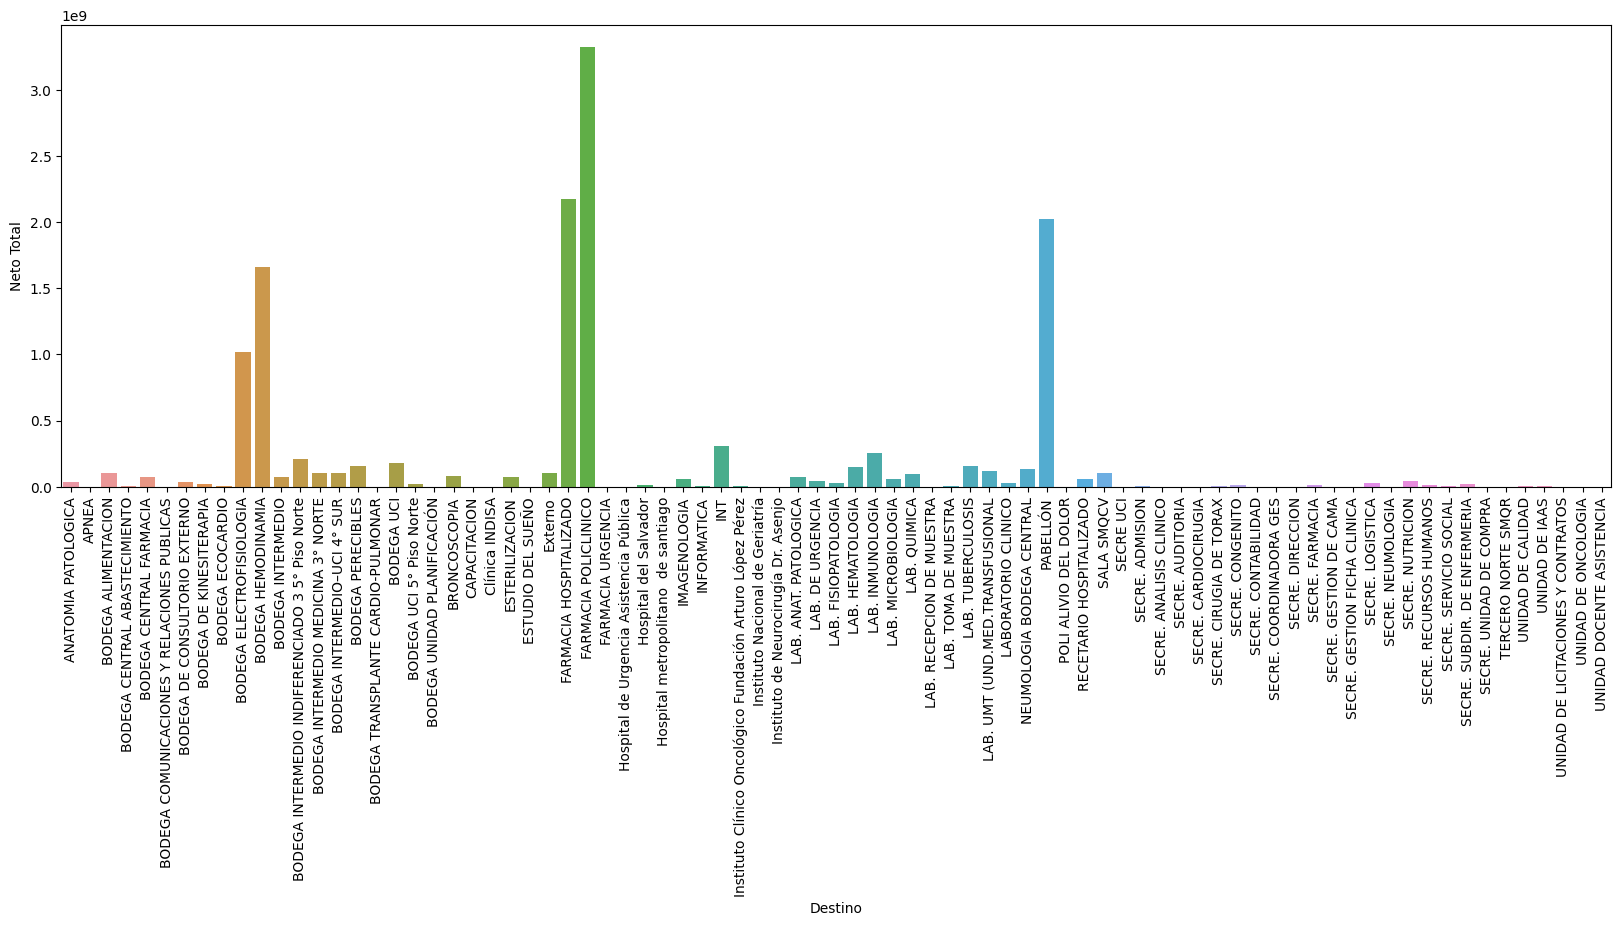

In [57]:
fig, axis = plt.subplots(1, 1, figsize=(20, 6))
sns.barplot(data=costos_por_unidades, x='Destino', y='Cantidad', ax=axis)
sns.barplot(data=costos_por_unidades, x='Destino', y='Neto Total', ax=axis)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
plt.show()
